# Laboratorio No. 3 - Modelacion y Simulacion

### 2.1 Crecimiento poblacional

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modelo

In [2]:
def model(t, P, r, K):
    return r * P * (1 - P / K)

### Runge-Kutta 4to orden

In [3]:
def runge_kutta_4(f, t0, y0, t_end, h, r, K):
    t = np.arange(t0, t_end + h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(1, n):
        k1 = h * f(t[i-1], y[i-1], r, K)
        k2 = h * f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1, r, K)
        k3 = h * f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2, r, K)
        k4 = h * f(t[i-1] + h, y[i-1] + k3, r, K)
        
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, y

### Parámetros

In [4]:
P0 = 10
r = 0.1
K = 1000
h = 0.1
T = 20

### Solución de la ecuación

In [5]:
t, P = runge_kutta_4(model, 0, P0, T, h, r, K)

### Resultado

In [6]:
print(f"Población estimada en T = 20: {P[-1]:.2f}")

Población estimada en T = 20: 69.45


### Gráfica de los resultados

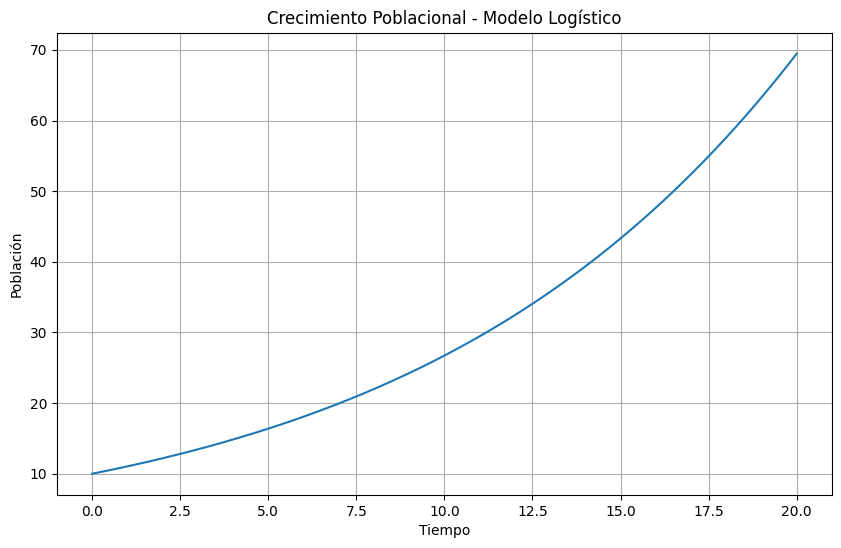

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, P)
plt.title('Crecimiento Poblacional - Modelo Logístico')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid(True)
plt.show()